In [1]:

import pandas as pd
from plotly import graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from wordcloud import WordCloud


import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:

zomato=pd.read_csv("zomato.csv", encoding = "ISO-8859-1")

In [4]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
zomato.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
#extracting those rows where average cost of 2 people is more  than 50,000
zomato[zomato["Average Cost for two"]>50000]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9276,18400530,Noah's Barn Coffeenery,94,Bandung,"Jl. Dayang Sumbi No. 2, Dago, Bandung",Dago,"Dago, Bandung",107.612790,-6.887058,"Cafe, Coffee and Tea, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.2,Green,Very Good,22
9277,7423620,Momo Milk,94,Bogor,"Jl. Kantor Pos No. 6, Bogor Timur, Bogor",Bogor Timur,"Bogor Timur, Bogor",106.810301,-6.606917,"Cafe, Desserts, Beverages",...,Indonesian Rupiah(IDR),No,No,No,No,2,3.7,Yellow,Good,783
9278,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.0,Green,Very Good,1159
9279,7422633,Talaga Sampireun,94,Jakarta,Jl. Lingkar Luar Barat,Cengkareng,"Cengkareng, Jakarta",106.728508,-6.168467,"Sunda, Indonesian",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,1662
9280,7405789,Toodz House,94,Jakarta,"Jl. Cipete Raya No. 79, Fatmawati, Jakarta",Fatmawati,"Fatmawati, Jakarta",106.801782,-6.278012,"Cafe, Italian, Coffee and Tea, Western, Indone...",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.6,Dark Green,Excellent,1476
9281,18425821,OJJU,94,Jakarta,"Gandaria City, Lantai Upper Ground, Jl. Sultan...","Gandaria City Mall, Gandaria","Gandaria City Mall, Gandaria, Jakarta",106.783162,-6.244221,Korean,...,Indonesian Rupiah(IDR),No,No,No,No,3,3.9,Yellow,Good,137
9282,7422751,Union Deli,94,Jakarta,"Grand Indonesia Mall, Lantai Ground, East Mall...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.819749,-6.197150,"Desserts, Bakery, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.6,Dark Green,Excellent,903
9283,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.1,Green,Very Good,1498
9284,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.6,Dark Green,Excellent,873
9285,18391256,MONKS,94,Jakarta,"Komplek Graha Boulevard Timur, Summarecon Kela...",Kelapa Gading,"Kelapa Gading, Jakarta",106.911335,-6.163948,"Western, Asian, Cafe",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.2,Green,Very Good,259


In [9]:
zomato.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
#extracting only the column which has null values
[features for features in zomato.columns if zomato[features].isna().sum()>0]

['Cuisines']

In [11]:
#reading an excel file which is attached with the dataset
country_code=pd.read_excel("../input/zomato-restaurants-data/Country-Code.xlsx")

In [12]:
country_code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [13]:
#performing a left maerge on the zomato dataset with country code
zomato=zomato.merge(country_code,on="Country Code",how="left")

In [14]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [15]:
## checking the data types
zomato.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [16]:
zomato["Country"].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

**India** is having the most strong base for zomato


([<matplotlib.patches.Wedge at 0x7f079b613a50>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

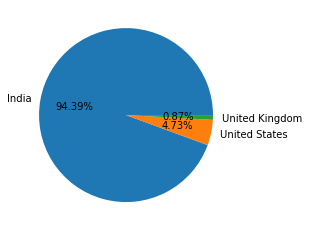

In [17]:
#pie chart to represent the country where zomato is widely used
plt.pie(zomato["Country"].value_counts().head(3),labels=zomato["Country"].value_counts().head(3).index,autopct="%1.2f%%")

Zomato most transactions are from **India** followed by **United States** and then **United Kingdom**

In [18]:
#first we extract the columns related to rating and then we are converting it to data frame
rating=zomato.groupby(["Aggregate rating",'Rating color','Rating text']).size().reset_index().rename(columns={0:"Rating Count"})

In [19]:
rating

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


**Observation:** 

1.When the rating is between 4.5 to 4.9 it means the food was Excellent

2.When the rating is between 4.0 to 4.4 it means the food was Very Good

3.When the rating is between 3.5 to 3.9 it means the food was Good

4.When the rating is between 2.5 to 3.4 it means the food was Average

5.When the rating is below 2.5 it means the food was Poor

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

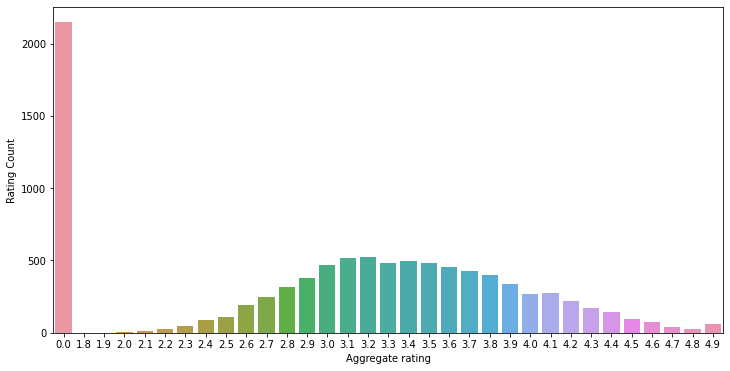

In [20]:
#plotting the count of each rating
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating",y="Rating Count",data=rating)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

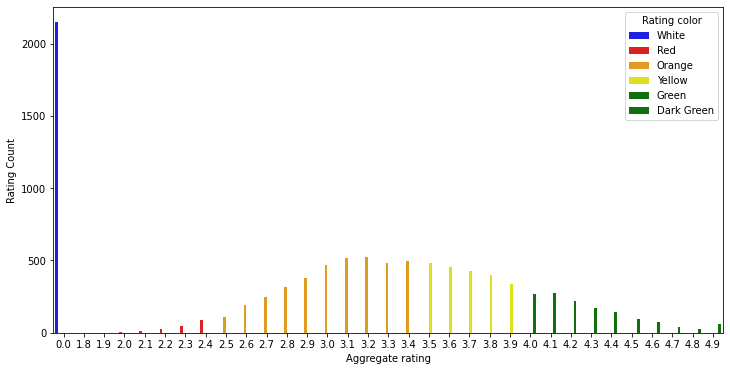

In [21]:
#plotting the count of rating with the color assigned to them in the dataset 
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating",y="Rating Count",data=rating,hue="Rating color",palette=["blue","red","orange","yellow","green","green"])

**Observation:**
1. Not rated count is the highest
2. Maximum ratings are between 2.5 to 3.5

<AxesSubplot:xlabel='Rating color', ylabel='count'>

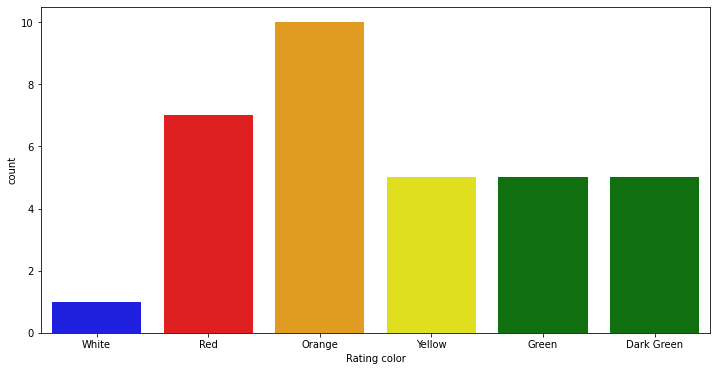

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x="Rating color",data=rating,palette=["blue","red","orange","yellow","green","green"])

In [23]:
#extracting the country who gave the most no. of zero rating and making a data frame
most_zero_rating=zomato[zomato["Aggregate rating"]==0].groupby("Country").size().sort_values(ascending=False).reset_index().rename(columns={0:"Count"})

In [24]:
most_zero_rating

,Country,Count
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


**Observations**

Maximum no. of 0 ratings are from Indian Customers

In [25]:
#the currency which is used in different country 
zomato.groupby(["Country",'Currency']).size().reset_index().rename(columns={0:"Count"})

,Country,Currency,Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [26]:
# no. of outlets in zomato which accepts online delivery
zomato["Has Online delivery"].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [27]:
#country where the resturants on zomato are providing the online delivery option 
zomato[zomato["Has Online delivery"]=="Yes"].groupby("Country").size()

Country
India    2423
UAE        28
dtype: int64

In [28]:
#grouping the country with the the online order facility and making a count of it 
zomato.groupby(["Country","Has Online delivery"]).size().reset_index().rename(columns={0:"Count"})

,Country,Has Online delivery,Count
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


**Observation**

1.Online delivery is available in India and UAE only


In [29]:
#city which has placed the most no. of orders on zomato
zomato["City"].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

([<matplotlib.patches.Wedge at 0x7f0798c49150>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

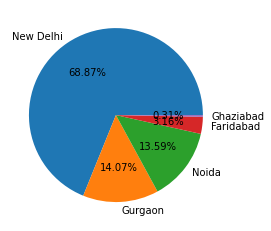

In [30]:
#representing the city in pie chart representation
plt.pie(zomato["City"].value_counts().head(5),labels=zomato["City"].value_counts().head(5).index,autopct="%1.2f%%")

**Observation**

1.New Delhi has the most no. of orders from all the cities

In [31]:
#the most famous and regularly ordered cuisines on zomato
zomato["Cuisines"].value_counts()[:10]

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

Text(0.5, 0, 'Name of the Cuisines')

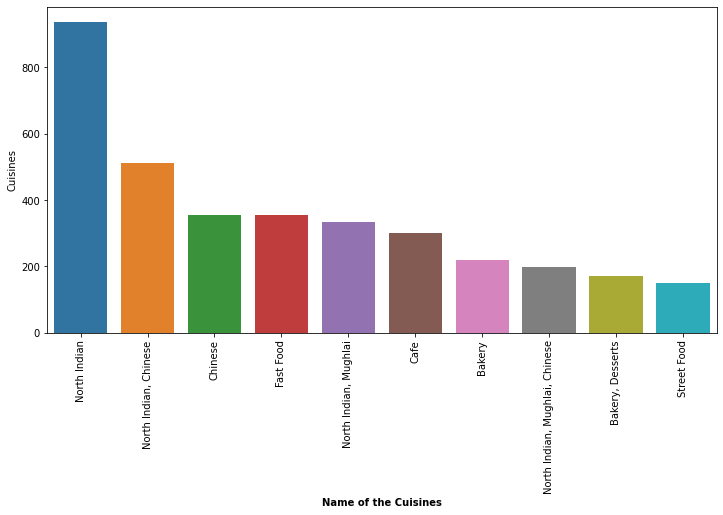

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(y=zomato["Cuisines"].value_counts()[:10],x=zomato["Cuisines"].value_counts()[:10].index)
plt.xticks(rotation=90)
plt.xlabel("Name of the Cuisines",fontweight="bold")

**Observation** 

1.North Indian was the most ordered food online on zomato 